# Обучение нейронной сети

На практике обучение нейронных сетей (подбор значений весов) производится при помощи **метода градиентного спуска**.

Обучение заключается в **минимизации функции потерь по обучаемым параметрам нейронной сети** — весам и смещениям.

Для минимизации функции потерь методом градиентного спуска **необходимо уметь вычислять градиент функции потерь по всем обучаемым параметрам модели**.

##  Прямое и обратное распространение

Процесс расчета градиента функции потерь по обучаемым параметрам состоит из двух этапов: **прямого и обратного распространения**.

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L05/out/forward_pass.png" width="500"></center>

Во время **прямого распространения** (forward pass) производится расчет значений на выходе модели $y_{pred}$, которые передаются в функцию потерь $\text{Loss}$ для сравнения с целевыми значениями $y_{true}$.

$$\large y_{pred}=\text{model}\left(x, 𝐖\right)$$

$$\large L=\text{Loss}\left(y_{true}, y_{pred}\right)$$

Значение функции потерь зависит от целевых значений $y_{true}$, входных данных $x$ и параметров модели $𝐖$.

$$\large L=\text{Loss}\left(y_{true}, \text{model}\left(x, 𝐖\right)\right) = f\left(y_{true}, x, 𝐖\right)$$

А значит, если модель и функция потерь дифференцируемы, мы можем посчитать $\nabla_𝐖L$ — градиент функции потерь по обучаемым параметрам. Для этого нужен этап **обратного распространения** (backward pass).

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L05/out/backward_pass.png" width="500"></center>

##  Метод обратного распространения ошибки

Для эффективного численного расчета градиента функции потерь по обучаемым параметрам модели применяется **метод обратного распространения ошибки (backpropagation)**. Благодаря данному методу становится практически возможным использование метода градиентного спуска для проведения процедуры обучения.

Метод обратного распространения ошибки использует структуру многослойной нейронной сети как сложной функции, применяя правило дифференцирования сложной функции для вычисления градиента от функции потерь по весам сети. Градиент от функции потерь вычисляется при движении по нейронной сети от её выходов в направлении входов. Именно такой порядок обхода вычислительного графа и обуславливает название метода.

Для более детального рассмотрения принципов работы и обучения нейронных сетей рекомендуем:

[[video] 📺 Плей-лист от 3Blue1Brown](https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&si=O3gq6RoIxoNS6iJf) [[озвучка на русском](https://youtube.com/playlist?list=PLZjXXN70PH5itkSPe6LTS-yPyl5soOovc&si=ElKVi98Ui4m2nJKq)].

### Вычислительный граф

По существу, нейронная сеть является сложной функцией, работу которой можно представить как последовательное выполнение математических операций. Такое представление функций называется [вычислительным графом ✏️[blog]](https://qudata.com/ml/ru/ML_Comp_Graph.html).

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L05/out/nn_fully_connected.png"  width="500"></center>

Алгоритм обратного распространения ошибки позволяет находить градиенты для любого графа вычислений, если описываемая им функция дифференцируема.

В его основе лежит правило взятия производной сложной функции (chain rule):

Одна переменная:

$$\large y(x) = f(u(g(x))) $$

$$\large \frac{dy}{dx} = \frac{df}{du} \frac{du}{dg} \frac{dg}{dx}$$

Несколько переменных:

$$\large y(x) = f(u_1(x),u_2(x),...u_n(x))$$

$$\large \frac{dy}{dx} = \sum_{i=1}^{n} \frac{\partial f(u_1, u_2, ... u_n)}{\partial u_i} \frac{du_i}{dx}$$

$$\large \underbrace{\frac{d}{dx} f(\vec{\mathbf{u}}(x))}_{\text{Derivative of composition function}} = \overbrace{\nabla_{\vec{u}} f \cdot \vec{\mathbf{u}}'(x)}^{\text{Dot product of vectors}}$$

####  Пошаговый разбор метода обратного распространения

Пусть в каком-то узле графа производится вычисление

$$\large z = f(x, y),$$

и далее результат вычисления $\large z$ используется для вычисления функции $\large L(z)=L(f(x, y))$.

Тогда правило вычисления производных $\dfrac{\partial L}{\partial x}$ и $\dfrac{\partial L}{\partial y}$ можно представить следующим образом:

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L05/out/rule_for_taking_gradients.png"  width="500"></center>

Рассмотрим следующую функцию:

$$\Large f(w,x)=\frac{1}{1+e^{-(w_0x_0+w_1x_1+w_2)}}$$

Представим ее в виде вычислительного графа, состоящего из элементарных операций, от которых просто берутся производные:

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L05/out/graph_of_calculation_gradient.png"  width="700"></center>

На примере данной функции рассмотрим алгоритм обратного распространения ошибки и найдём величину её градиента по параметрам $\large w$.
Нам потребуется вычислить частные производные $\dfrac{\partial f}{\partial w_0}, \dfrac{\partial f}{\partial w_1}, \dfrac{\partial f}{dw_2}, \dfrac{\partial f}{\partial x_0}$ и $\dfrac{\partial f}{\partial x_1}$.

Пусть "веса" $w$ инициализированы значениями $w_0=2,\;w_1=-3,\;w_2=-3$, а "входные признаки" $x$ принимают значения $x_0=-1,\;x_1=-2$.

Делая прямой проход через граф вычислений для данной функции, получаем её значение для заданных $w$ и $x$ равным $f=0.73$:

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L05/out/forward_pass_example.png" width="800"></center>

Далее, в соответствии с алгоритмом обратного распространения ошибки, рассчитаем частные производные, пройдясь последовательно по графу вычислений, постепенно накапливая искомое значение для градиента функции.

Для начала зададим $\dfrac{df}{df}=1$.

Начинаем обратный проход по графу вычислений — первая вершина содержит функцию $f(x)=\dfrac{1}{x}$, производная которой равна $\dfrac{df}{dx}=-\dfrac{1}{x^2}$

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L05/out/compute_gradient_1_step.png" width="800"></center>

$$\large f(x)=\frac1x \quad \longrightarrow \quad \frac{df}{dx} = -\frac{1}{x^2}$$

В следующем узле находится функция $f(x)=1+x$. Производная от выражения в данном узле равняется $\dfrac{df}{dx}=1$:

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L05/out/compute_gradient_2_step.png" width="800"></center>

$$\large f(x)=c+x \quad \longrightarrow \quad \frac{df}{dx} = 1$$

Третья вершина содержит экспоненту $f(x)=e^x$. Её производная также является экспонентой $\dfrac{df}{dx}=e^x$:

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L05/out/compute_gradient_3_step.png" width="800"></center>

$$\large f(x)=e^x \quad \longrightarrow \quad \frac{df}{dx} = e^x$$

Следующая вершина, четвертая, содержит умножение на константу $f(x)=ax$. Производная равна $\dfrac{df}{dx}=a$ (в данном случае $a=-1$):

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L05/out/compute_gradient_4_step.png" width="800"></center>

$$\large f(x)=ax \quad \longrightarrow \quad \frac{df}{dx} = a$$

Двигаясь по графу вычислений, мы дошли до узла суммирования, который имеет два входа. Относительно каждого из входов локальный градиент в вершине суммирования будет равен $1$:
$$\large f(x,y)=x+y \quad \Rightarrow \quad \frac{\partial f}{\partial x}=1  \quad \quad \frac{\partial f}{\partial y}=1$$
Так как умножение на единицу не изменит значения входного градиента, всем входам узла суммирования мы можем приписать точно такое же значение входного градиента ($0.2$), что мы имели и для самого узла суммирования. Будем действовать аналогично и со всеми остальными узлами суммирования, которые встретятся нам в вычислительном графе.

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L05/out/compute_gradient_5_step.png" width="800"></center>

Двигаясь далее к началу графа вычислений, мы подходим к вершинам умножения. Для такой вершины локальный градиент по отношению к какому-либо из входов будет равен значению оставшегося входа. Остается умножить локальный градиент на входящий.

$$\large f(w,x)=wx \quad \Rightarrow \quad \frac{\partial f}{\partial w}=x  \quad \quad \frac{\partial f}{\partial x}=w$$

Точно так же мы можем поступить и с оставшейся второй вершиной умножения, которая привязана к $w_1$ и $x_1$:

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L05/out/compute_gradient_6_step.png" width="800"></center>

Так, двигаясь по графу вычислений в обратном направлении от выхода функции к входным аргументам, мы последовательно для каждого узла умножаем локальный градиент на входящий градиент, используя цепное правило дифференцирования сложной функции. В описанном примере мы полностью разбили граф вычислений на отдельные элементарные узлы. Разбиение вычислительного графа на элементарные узлы вовсе не обязательно — мы можем сгруппировать несколько вершин вместе, если они образуют дифференцируемую функцию, от которой "удобно" брать производную, и рассматривать их совместно.

В нашем примере мы можем заметить, что вычислительный граф можно свести к двум операциям: получению выражения $w_0x_0+w_1x_1+w_2$ и последующему вычислению от него сигмоидальной функции.

Функция сигмоиды:

$$\large \displaystyle \sigma(x) = \frac{1}{1+e^{-x}}.$$

Важно отметить, что сигмоида обладает важным свойством: её производная может быть выражена через саму сигмоидальную функцию:

$$\large \frac{d}{dx}\sigma(x) = \frac{d}{dx}(1+e^{-x})^{-1} = \frac{e^{-x}}{(1+e^{-x})^{2}} = \frac{1}{1+e^{-x}} \cdot \frac{1+e^{-x}-1}{1+e^{-x}} = \sigma(x)\cdot(1-\sigma(x))$$

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L05/out/compute_gradient_join_vertices_sigmoid_example.png" width="800"></center>

В коде без использования библиотек подсчёт градиентов можно записать как:

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L05/out/calculating_gradients_in_code.png" width="800"></center>

#### Реализация в PyTorch

Практически вся наша работа c нейронными сетями будет осуществляться с помощью [PyTorch 🛠️[doc]](https://pytorch.org/), поэтому необходимо познакомиться с основными концептами, принципами и функциями этой библиотеки.

Лучший друг в этом, конечно же, [документация 🛠️[doc]](https://pytorch.org/docs/stable/index.html), здесь же мы разберем только основные сущности и методы.

##### Основная сущность — torch.Tensor

Класс `torch.Tensor` [🛠️[doc]](https://pytorch.org/docs/stable/tensors.html#torch.Tensor) предоставляет функциональность работы с многомерными массивами.

Создание "пустого" тензора:

In [ ]:
import torch

a = torch.Tensor()

Функция создания тензора из списка:

In [ ]:
a = torch.tensor([1.1, 2.2, 3.2])
a.dtype

torch.float32

Явное указание типа данных:

In [ ]:
a = torch.tensor([1.1, 2.2, 3.2], dtype=torch.float64)
a.dtype

torch.float64

Создание двумерного тензора, заполненного единицами (для нулей `zeros`)

In [ ]:
a = torch.ones(size=(3, 2))
a.size()

torch.Size([3, 2])

Создание двумерного тензора, заполненного указанным значением


In [ ]:
a = torch.full(size=(3, 2), fill_value=3.74)
a

tensor([[3.7400, 3.7400],
        [3.7400, 3.7400],
        [3.7400, 3.7400]])

Транспонирование (изменение порядка осей)

In [ ]:
a = a.T
a

tensor([[3.7400, 3.7400, 3.7400],
        [3.7400, 3.7400, 3.7400]])

В библиотеке реализовано большое количество математических функций

In [ ]:
c = torch.exp(a)
print("Exponents tensor:\n", c)

c += 1
print("\nAdd 1 to tensor:\n", c)

Exponents tensor:
 tensor([[42.0980, 42.0980, 42.0980],
        [42.0980, 42.0980, 42.0980]])

Add 1 to tensor:
 tensor([[43.0980, 43.0980, 43.0980],
        [43.0980, 43.0980, 43.0980]])


Почти всё, что есть в NumPy, есть в PyTorch. Например, суммирование значений тензора с помощью `.sum()`:

In [ ]:
c.sum()

tensor(258.5880)

Перестановка, удаление и добавление пространственных измерений:

In [ ]:
a = torch.zeros((2, 5, 1, 8))
print("Original tensor size:\n", a.size())

a = a.permute(dims=(2, 0, 3, 1))  # permute dimensions
print("After permute tensor size:\n", a.size())

a = a.squeeze()  # delete dimension
print("After squzee tensor size:\n", a.size())

a = a.unsqueeze(dim=0)  # add dimension
print("After unsquzee tensor size:\n", a.size())

Original tensor size:
 torch.Size([2, 5, 1, 8])
After permute tensor size:
 torch.Size([1, 2, 8, 5])
After squzee tensor size:
 torch.Size([2, 8, 5])
After unsquzee tensor size:
 torch.Size([1, 2, 8, 5])


Преобразование `torch.Tensor` в `np.ndarray`:

In [ ]:
a.numpy()

array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)

PyTorch позволяет тензору быть представлением (view) существующего тензора. Тензор представления использует те же данные, что и его базовый тензор. Поддержка `view` позволяет избежать явного копирования данных, что позволяет экономить память.

In [ ]:
a = torch.rand(2, 8)
print("Original tensor:\n", a)

b = a.view(4, 4)
print("\nTensor after view:\n", b)

print("\nTensor b uses the same memory space as tensor a:")
id(a[0, 0]) == id(b[0, 0])

Original tensor:
 tensor([[0.5866, 0.9471, 0.2331, 0.5124, 0.3771, 0.1982, 0.9801, 0.9984],
        [0.5709, 0.2533, 0.7210, 0.5402, 0.2095, 0.3625, 0.4288, 0.5829]])

Tensor after view:
 tensor([[0.5866, 0.9471, 0.2331, 0.5124],
        [0.3771, 0.1982, 0.9801, 0.9984],
        [0.5709, 0.2533, 0.7210, 0.5402],
        [0.2095, 0.3625, 0.4288, 0.5829]])

Tensor b uses the same memory space as tensor a:


True

Размещение тензора на GPU:

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Cuda available: {torch.cuda.is_available()} \n")

a = a.to(device)  # moving tensor to gpu
b = torch.full_like(a, 2).to(device)
c = a * b  # compute on gpu (more fast with parallel computing)
c

Cuda available: False 



tensor([[1.1732, 1.8942, 0.4663, 1.0247, 0.7543, 0.3965, 1.9602, 1.9967],
        [1.1418, 0.5066, 1.4419, 1.0803, 0.4190, 0.7249, 0.8575, 1.1658]])

##### Автоматическое вычисление градиента

PyTorch умеет запоминать последовательность операций с тензорами и вычислять градиент.

Вспомним функцию из примера выше

$$\Large f(w,x)=\sigma(w_0x_0+w_1x_1+w_2)$$

И построим ее вычислительный граф при $x_0=-1, x_1=-2, w_0=2,\;w_1=-3,\;w_2=-3$.

In [ ]:
# x from above example
x0 = torch.tensor(-1.0, requires_grad=True)
x1 = torch.tensor(-2.0, requires_grad=True)

# w from above example
w0 = torch.tensor(2.0, requires_grad=True)
w1 = torch.tensor(-3.0, requires_grad=True)
w2 = torch.tensor(-3.0, requires_grad=True)

# forward pass to compute f
s = x0 * w0 + x1 * w1 + w2
f = torch.sigmoid(s)

print(f"f(x, W) = {f:.2f}")

f(x, W) = 0.73


При создании тензоров мы указали параметр `requires_grad=True`. Установка этого параметра указывает PyTorch на то, что необходимо отслеживать операции, в которых участвует данный тезор, для построения вычислительного графа и последующего вычисления градиента.

Можно визуализировать получившийся вычислительный граф с помощью библиотеки torchviz.

In [ ]:
from IPython.display import clear_output

!pip install -qU torchviz
clear_output()

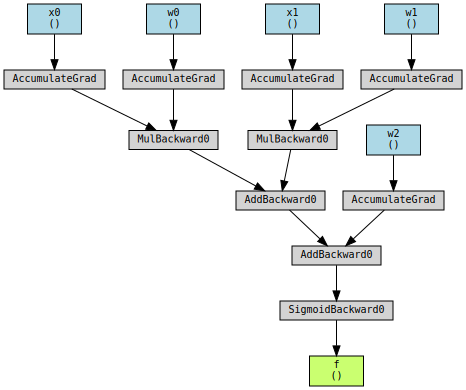

In [ ]:
from torchviz import make_dot

make_dot(f, params={"x0": x0, "x1": x1, "w0": w0, "w1": w1, "w2": w2, "f": f})

Для того, чтобы рассчитать градиент функции по всем параметрам, надо вызвать метод `backward`:

In [ ]:
print("gradient is None before backward")
print(f"w0.grad = {w0.grad}")
print(f"w1.grad = {w1.grad}")
print(f"w2.grad = {w2.grad}")

# backward pass to compute gradient df/dW
f.backward()

print("\ngradient computed after backward")
print(f"w0.grad = {w0.grad}")
print(f"w1.grad = {w1.grad}")
print(f"w2.grad = {w2.grad}")

gradient is None before backward
w0.grad = None
w1.grad = None
w2.grad = None

gradient computed after backward
w0.grad = -0.1966119259595871
w1.grad = -0.3932238519191742
w2.grad = 0.1966119259595871


Получили такие же значения частных производных $\dfrac{\partial f}{\partial w_i}$, как и при вычислении вручную (на иллюстрации градиент расчитан с точностью до двух знаков после запятой, в коде выше получены более точные значения).

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L05/out/autograd_example.png" width="700"></center>

Все те же вычисления, что и несколькими ячейками выше, можно записать короче и произвести за счет скалярного произведения тензора признаков $x$ и тензора весов $w$:

In [ ]:
x = torch.tensor([-1.0, -2.0])  # x from above example

x = torch.cat([x, torch.tensor([1.0])])  # concatenate x with 1. for bias trick

W = torch.tensor([2.0, -3.0, -3.0], requires_grad=True)  # w from above example

print(f"W.grad = {W.grad} (before forward and backward pass grad is 'None')")

# forward pass to compute f
s = x.matmul(W)
f = torch.sigmoid(s)
print(f"f(x, W) = {f:.2f}")

# backward pass to compute gradient df/dW
f.backward()
print(f"W.grad = {W.grad}")

W.grad = None (before forward and backward pass grad is 'None')
f(x, W) = 0.73
W.grad = tensor([-0.1966, -0.3932,  0.1966])


Мы не требовали возможности расчета градиента по аргументу `x` (не указали `requires_grad=True`), поэтому после вызова `f.backward()` градиент по нему не рассчитается:

In [ ]:
print(f"x.grad = {x.grad}")

x.grad = None


Отсоединение тензора от графа вычислений производится с помощью `.detach()` (используется, если нужно производить какие-либо дальнейшие операции с тензором, но чтобы они не становились частью вычислительного графа):

In [ ]:
f_detached = f.detach()

print(f"f_detached = {f_detached:.2f}")
print(f"f_detached type: {type(f_detached)}")

f_detached = 0.73
f_detached type: <class 'torch.Tensor'>


Также от тензора, содержащего скаляр, можно получить его величину с помощью `.item()`:

In [ ]:
value = f_detached.item()

print(f"value = {value:.2f}")
print(f"value type: {type(value)}")

value = 0.73
value type: <class 'float'>


###  Обратное распространение в PyTorch


Рассмотрим алгоритм обратного распространения на примере вычисления квадрата ошибки для линейной регрессии (для простоты не будем рассматривать смещение):

$$\large y=w\cdot x, \quad при \;x=[1,2,3,4],\;y=[2,4,6,8],\;w=1$$

В данном примере видно, что предсказанный моделью $\hat{y}=[1,2,3,4]$ не совпадает с истинными значениями $y$, и, соответственно, квадратичная ошибка для такого примера будет:

$$\large \text{MSE}=\frac{1}{4}\sum_{i=1}^4E_i^2=\frac{1}{4}\sum_{i=1}^4(\hat{y}_i-y_i)^2=\frac{1+4+9+16}{4}=7.5$$

Градиент функции потерь по весу $w$ вычисляется следующим образом, в соответствии с цепным правилом:

$$\large \frac{\partial \text{MSE}}{\partial w} = \frac{\partial \text{MSE}}{\partial E}\cdot \frac{\partial E}{\partial \hat{y}}\cdot \frac{\partial \hat{y}}{\partial w}$$

Рассчитаем его с использованием PyTorch:



In [ ]:
x_train = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y_train = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

# This is the parameter we want to optimize -> requires_grad=True
W = torch.tensor(1.0, dtype=torch.float32, requires_grad=True)
print(f"W.grad = {W.grad} (before forward pass must be 'None')\n")

# forward pass to compute MSE
y_pred = W * x_train
E = y_pred - y_train
SE = E**2
MSE = SE.mean()
print(f"MSE = {MSE}")

# backward pass to compute gradient dMSE/dw
MSE.backward()
print(f"W.grad = {W.grad}")

W.grad = None (before forward pass must be 'None')

MSE = 7.5
W.grad = -15.0


В данном примере мы произвели следующие расчеты:

$\displaystyle\frac{\partial \text{MSE}}{\partial E}=\frac{1}{4}\frac{\partial E^2}{\partial E}=\frac{1}{4}\cdot2\cdot E=\frac{1}{2}*[-1, -2, -3, -4]=[-0.5, -1, -1.5, -2]\quad $ $*$ — поэлементное умножение

$\displaystyle \frac{\partial E}{\partial \hat{y}}=\frac{\partial (\hat{y}-y)}{\partial \hat{y}}=1$

$\displaystyle \frac{\partial \hat{y}}{\partial w}=\frac{\partial wx}{\partial w}=x=[1, 2, 3, 4]$

$\displaystyle \frac{\partial \text{MSE}}{\partial w} = \frac{\partial \text{MSE}}{\partial E}\cdot \frac{\partial E}{\partial \hat{y}}\cdot \frac{\partial \hat{y}}{\partial w}=\sum[-0.5, -1, -1.5, -2]*[1, 2, 3, 4]=-0.5-2-4.5-8=-15$

`MSE.backward()` автоматически вычисляет градиент $\dfrac{\partial \text{MSE}}{\partial w}$ при указании `requires_grad=True`.
Результаты вычислений будут храниться в `W.grad`. Для всех промежуточных переменных градиенты не сохраняются, поэтому попытка обратиться, например, к `E.grad` выдаст ошибку.

Также после однократного обратного прохода в целях экономии памяти граф, используемый для вычисления градиента, будет удаляться, и следующий запуск `MSE.backward()` будет выдавать ошибку:



```
MSE.backward() # Error on second backward call
```



Чтобы сохранить вычислительный граф, нужно взывать `backward()` с параметром `retain_graph=True`. В таком случае значения градиентов, полученные на следующих итерациях обратного распространения ошибки, будут складываться с текущими значениями градиентов.

Градиенты переменных, для которых был указан `requires_grad=True`, сохраняются автоматически. Чтобы избежать их накопления при многократном итерировании алгоритма обратного распространения, нужно обнулять градиент на каждом шаге с помощью метода `Тensor.grad.zero_()`.

In [ ]:
x_train = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y_train = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

# This is the parameter we want to optimize -> requires_grad=True
W = torch.tensor(1.0, dtype=torch.float32, requires_grad=True)

# forward pass to compute MSE
y_pred = W * x_train
MSE = ((y_pred - y_train) ** 2).mean()

print("Backward 1:")
MSE.backward(retain_graph=True)
print(f"dMSE/dW = {W.grad} \n")

print("Without forward, backward 2. Gradient is accumulating:")
MSE.backward(retain_graph=True)
# Gradients are accumulated
print(f"dMSE/dW = {W.grad}\n")

print("Backward 3, but firstly nullify gradients:")
W.grad.zero_()  # Nullify gradients for W for the next iteration
MSE.backward(retain_graph=True)
print(f"dMSE/dW = {W.grad}")

Backward 1:
dMSE/dW = -15.0 

Without forward, backward 2. Gradient is accumulating:
dMSE/dW = -30.0

Backward 3, but firstly nullify gradients:
dMSE/dW = -15.0


Итак, мы умеем вычислять градиент $\displaystyle \frac{\partial \text{MSE}}{\partial w}$ для нашего примера. Теперь давайте с его помощью оптимизируем веса, используя алгоритм обратного распространения ошибки:

In [ ]:
x_train = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y_train = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

W = torch.tensor(1.0, dtype=torch.float32, requires_grad=True)


# Define model output
def forward(x_train):
    return W * x_train


# Compute MSE loss
def criterion(y_pred, y_train):
    return ((y_pred - y_train) ** 2).mean()


print(f"Prediction before training: f(x) = {forward(x_train)}")
print(f"True values: y = {y_train}\n")

# Training
learning_rate = 0.005
num_epochs = 102

for epoch in range(num_epochs):
    # Propagate forward
    y_pred = forward(x_train)

    # Compute MSE loss
    MSE = criterion(y_pred, y_train)

    # Propagate backward, compute gradients
    MSE.backward()

    # Update weights
    with torch.no_grad():  #  We don't want this step to be the part of the computational graph
        W -= learning_rate * W.grad

    # Nullify gradients after updating to avoid their accumulation
    W.grad.zero_()

    if epoch % 10 == 1:
        print(f"epoch {epoch}: w = {W.item():.3f}, loss = {MSE.item():.8f}")

print(f"\nPrediction after training: f(x) = {forward(x_train)}")
print(f"True values: y = {y_train}")

Prediction before training: f(x) = tensor([1., 2., 3., 4.], grad_fn=<MulBackward0>)
True values: y = tensor([2., 4., 6., 8.])

epoch 1: w = 1.144, loss = 6.41718674
epoch 11: w = 1.608, loss = 1.34952068
epoch 21: w = 1.820, loss = 0.28380114
epoch 31: w = 1.917, loss = 0.05968266
epoch 41: w = 1.962, loss = 0.01255111
epoch 51: w = 1.983, loss = 0.00263946
epoch 61: w = 1.992, loss = 0.00055505
epoch 71: w = 1.996, loss = 0.00011674
epoch 81: w = 1.998, loss = 0.00002455
epoch 91: w = 1.999, loss = 0.00000516
epoch 101: w = 2.000, loss = 0.00000109

Prediction after training: f(x) = tensor([1.9996, 3.9993, 5.9989, 7.9986], grad_fn=<MulBackward0>)
True values: y = tensor([2., 4., 6., 8.])


Видно, что наш подход позволяет оптимизировать вес $w$ регрессии из примера и таким образом добиться почти идеального предсказания нашей модели, однако в данном подходе дополнительно можно автоматизировать вычисление функции потерь и обновление параметров с учетом градиента, используя готовые функции потерь из `torch.nn` и оптимизаторы из `torch.optim`.

In [ ]:
import torch.nn as nn


x_train = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y_train = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

W = torch.tensor(1.0, dtype=torch.float32, requires_grad=True)


# Define model output
def forward(x_train):
    return W * x_train


print(f"Prediction before training: f(x) = {forward(x_train)}")
print(f"True values: y = {y_train}\n")

# Training
learning_rate = 0.005
num_epochs = 102

criterion = nn.MSELoss()
optimizer = torch.optim.SGD([W], lr=learning_rate)

for epoch in range(num_epochs):
    # Propagate forward
    y_pred = forward(x_train)

    # Compute MSE loss
    MSE = criterion(y_pred, y_train)

    # Propagate backward, compute gradients
    MSE.backward()

    # Update weights
    optimizer.step()

    # Nullify gradients after updating to avoid their accumulation
    optimizer.zero_grad()

    if epoch % 10 == 1:
        print(f"epoch {epoch}: w = {W.item():.3f}, loss = {MSE.item():.8f}")

print(f"\nPrediction after training: f(x) = {forward(x_train)}")
print(f"True values: y = {y_train}")

Prediction before training: f(x) = tensor([1., 2., 3., 4.], grad_fn=<MulBackward0>)
True values: y = tensor([2., 4., 6., 8.])

epoch 1: w = 1.144, loss = 6.41718674
epoch 11: w = 1.608, loss = 1.34951985
epoch 21: w = 1.820, loss = 0.28380090
epoch 31: w = 1.917, loss = 0.05968266
epoch 41: w = 1.962, loss = 0.01255111
epoch 51: w = 1.983, loss = 0.00263946
epoch 61: w = 1.992, loss = 0.00055505
epoch 71: w = 1.996, loss = 0.00011674
epoch 81: w = 1.998, loss = 0.00002455
epoch 91: w = 1.999, loss = 0.00000516
epoch 101: w = 2.000, loss = 0.00000109

Prediction after training: f(x) = tensor([1.9996, 3.9993, 5.9989, 7.9986], grad_fn=<MulBackward0>)
True values: y = tensor([2., 4., 6., 8.])
